<a href="https://colab.research.google.com/github/joyjitroy/Machine_Learning/blob/Machine_Learning/FoodHub%20Predictive%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Mount the Google Drive

In [ ]:
# Mount google drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the dataset

In [ ]:
# Read the Data from excel into a dataset
folder = '/content/drive/MyDrive/AI_ML/Projects/Python Project/'
file = 'foodhub_order.csv'
data = pd.read_csv(folder + file)

### Understanding the structure of the data

In [ ]:
# returns the first 5 rows from dataset
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations**: The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the number of rows and columns in the Dataset Shape
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


**Observations**: There are **1898** rows and **9** columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Print a concise summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**:
- All the columns have 1898 observations
- There are 4 object type columns (`restaurant_name`, `cuisine_type`, `day_of_the_week` and `rating`)
- Rest of the 5 columns (`order_id`, `customer_id`, `cost_of_the_order`, `foold_preparation_time` and `delivery time`) are numerical in nature

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values in the Dataset
data.isnull().sum() # agreegating the Null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations**: There are no missing values in any of the Columns


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Pribt statistical summary of the data using describe() method
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
# Alternative code
# Print the Min, Max and and Average of the Food preperation time
print("The minimum food preparation time is", data.food_preparation_time.min(), "minutes,",
      "maximum food preparation time is",  data.food_preparation_time.max(), "minutes,",
      "with average food preparation time", "{:.2f}".format(data.food_preparation_time.mean()), "minutes") # .2f means 2 decimal places

The minimum food preparation time is 20 minutes, maximum food preparation time is 35 minutes, with average food preparation time 27.37 minutes


**Observations**:
 - Printed the statistical summary of the data in the above table. Following information have been extracted from the summary.
 - The Min food processing time is **20** minutes
 - The Max food processing time is **35** minutes
 - The average food processing time is **27.37** minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Check counts of different unique Ratings and from there find the orders not Rated
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
# Alternate code
# use to_numeric() to convert all the non numeric data to NaN in Rating column
# and then agreegate those NaN Values.

non_numeric_count = pd.to_numeric(data['rating'], errors='coerce').isna().sum()
print('There are', non_numeric_count, 'orders not Rated')

There are 736 orders not Rated


**Observations**: There are 736 orders are not Rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### **Let's check if there any duplicate records**

---



In [ ]:
#Check on duplicate records
data.duplicated().sum()

0

**Observation**: There are no Duplicate records

##### **Order ID**

In [ ]:
# Check if the Order Numbers are unique
print('Total unique order ID is', data['order_id'].nunique())
print('Total record on detaset is', len(data['order_id']))

Total unique order ID is 1898
Total record on detaset is 1898


**Observation**: Order Numbers are unique

##### **Customer ID**

In [ ]:
# Check the number of unique Customer ID
print('There are', data['customer_id'].nunique(), 'unique customers')

There are 1200 unique customers


**Observation**: There are 1200 unique customers

##### **Distribution of the total number of orders by individual customers**

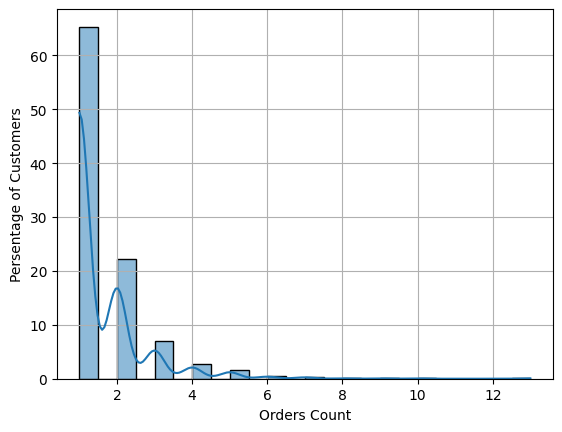

In [ ]:
# Check the distribution of the total number of orders by individual customers
sns.histplot(data = data, x=data['customer_id'].value_counts(), stat='percent', kde= True, bins = 24)
plt.xlabel("Orders Count")
plt.ylabel("Persentage of Customers")
plt.grid(True) # display the grid for better measurement
plt.show();

**Observation**: Around 65% of the customers place orders only once

##### **Restaurant Name**

In [ ]:
# Check the number of unique restaurants
print('There are', data['restaurant_name'].nunique(), 'unique restaurants')

There are 178 unique restaurants


**Observation**: There are 178 unique restaurants

##### **Distribution of the total number of orders by Restaurants**

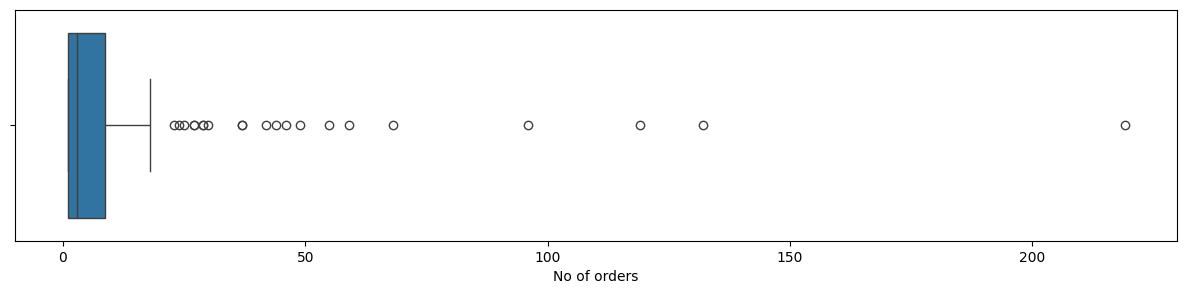

In [ ]:
# Distribution of the total number of orders by Restaurants

# Resize the plot
plt.figure(figsize=(15, 3))

# Check the distribution of the orders by Restaurants using boxplot
sns.boxplot(data = data, x =data['restaurant_name'].value_counts())
plt.xlabel("No of orders")
plt.show();

**Observation**: The restaurants' order count box plot is skewed right with lots of outliers. This means most restaurants received a small number of orders, but there are a few restaurants that received exceptionally large volume of orders

##### **Cuisine type**

In [ ]:
# Check the number of unique cuisines
print('There are', data['cuisine_type'].nunique(), 'unique cuisines')

There are 14 unique cuisines


**Observation**: There are 14 unique cuisines



##### **Distribution of the total number of orders by Cuisine**

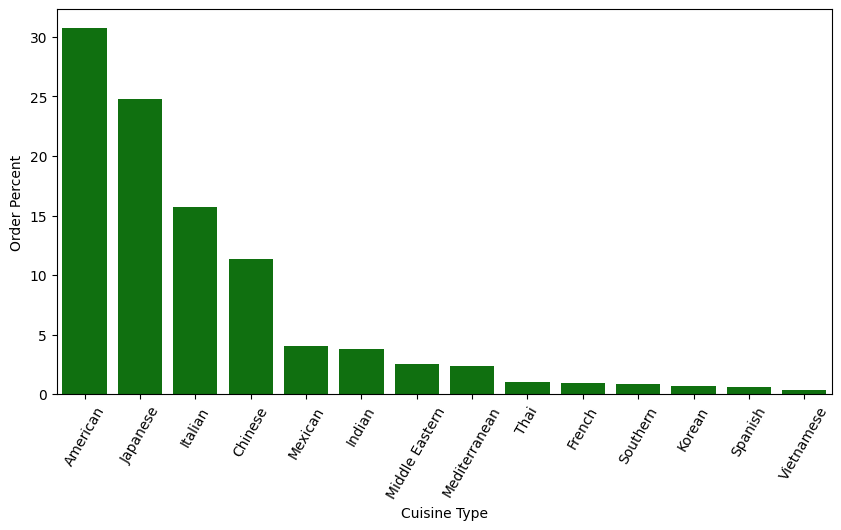

In [ ]:
# Check the distribution of the total number of orders by cousine types

# Resize the plot
plt.figure(figsize=(10, 5))

# Check the distribution of the orders by Restaurants using boxplot
sns.countplot(data = data, x='cuisine_type', color = 'g', stat='percent',
              order=data["cuisine_type"].value_counts().index) # Use order parameter to sort the cuisine type
plt.xlabel("Cuisine Type")
plt.ylabel("Order Percent")
plt.xticks(rotation=60)
plt.show();

**Observation**:
 - Top four most ordered cuisines are American, Japanese, Italian, and Chinese and together they consume more than 80% of the orders.
 - Vietnamese cuisine has the lowest orders

##### **Cost of the order**

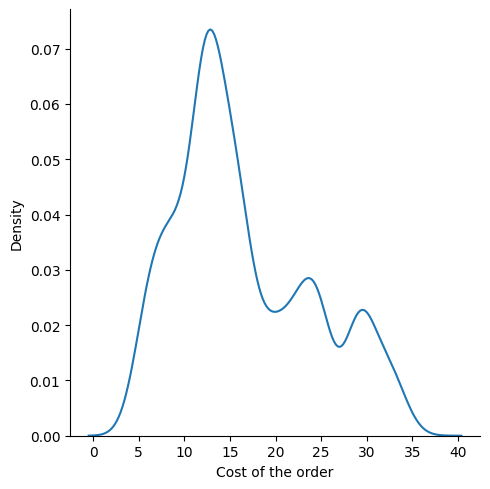

In [ ]:
# Check the discrioution of cost of the orders using displot
sns.displot(data = data, x='cost_of_the_order', kind='kde')
plt.xlabel("Cost of the order")
plt.show()

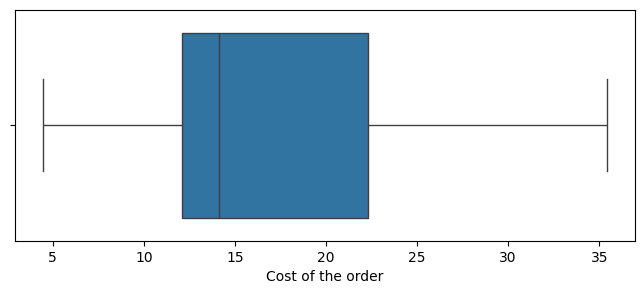

In [ ]:
# Resize the plot
plt.figure(figsize=(8, 3))

# Check the distribution of the cost of the orders using boxplot
sns.boxplot(data = data, x ='cost_of_the_order')
plt.xlabel("Cost of the order")
plt.show()

**Observation**: Order cost distributed right skewed with no outliers indicating the price is very competitive and the Cost of the 75% of the order is less than 23 dollars

##### **Days of the week**

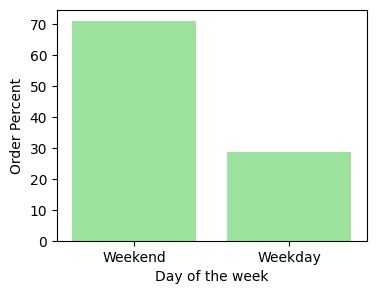

In [ ]:
# Resize the plot
plt.figure(figsize=(4, 3))

# Check the distribution of orders by Day of the week using countplot
sns.countplot(data = data, x='day_of_the_week', stat='percent', color = 'lightgreen')
plt.xlabel("Day of the week")
plt.ylabel("Order Percent")
plt.show()

**Observation**: Around 70% of the orders are placed during the weekend

##### **Rating**

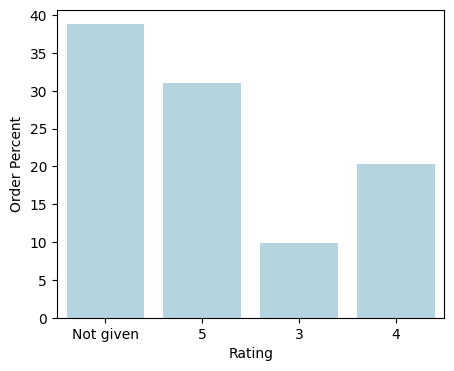

In [ ]:
# Resize the plot
plt.figure(figsize=(5, 4))

# Check the distribution of orders by Rating using countplot
sns.countplot(data = data, x=data['rating'], stat='percent', color = 'lightblue')
plt.xlabel("Rating")
plt.ylabel("Order Percent")
plt.show()

**Observation**: Around 38% of the orders have not been rated. Customers who rated the food and delivery service mostly give 5 stars. there is no rating less than 3

##### **Foor preperation time**

In [ ]:
# Check the discrioution of Food preparation time using Histplot or Displot
# sns.histplot(data = data, x ='food_preparation_time', color= 'lightgreen', kde = True)
sns.displot(data = data, x='food_preparation_time', kind='hist', kde = True, color= 'lightgreen', aspect = 1.3)
plt.xlabel("Food preperation time")
plt.ylabel("Order Count")
plt.show()

# Resize the plot
plt.figure(figsize=(8, 3))

# Check the discrioution of Food preparation time using Boxplot
sns.boxplot(data = data, x ='food_preparation_time', color= 'lightgreen')
plt.xlabel("Food preperation time")
plt.show()

**Observation**: Food preparation time is symmetrically distributed with a range from 20 to 35 minutes, with no outliers. The median food preparation time is around 27 minutes

##### **Delivery Time**

In [ ]:
# Check the distribution of Delivery time using Histplot or Displot
# sns.histplot(data = data, x ='delivery_time', kde = True)
sns.displot(data = data, x='food_preparation_time', kind='hist', kde = True, aspect = 1.3)
plt.xlabel("Food delivery time")
plt.ylabel("Order Count")
plt.show()

# resize the plot
plt.figure(figsize=(8, 3))

# Check the distribution of Delivery time using Boxplot
sns.boxplot(data = data, x ='delivery_time')
plt.xlabel("Food delivery time")
plt.show()

**Observation**: Food delivery time is slightly skewed to the left with a range from 15 to 33 minutes, with no outliers. The median delivery time is around 25 minutes

####**Overall Observation after Univariate analysis**:
* **Order Numbers**: Order numbers are unique
* **Customer Id**: There are 1200 unique customers. Around 65% of the customers place orders only once
* **Restaurants**: There are 178 unique restaurants. Most restaurants received a small number of orders, but there are a few restaurants that received exceptionally large volumes of orders
* **Cuisines**: There are 14 unique cuisines. The top four most ordered cuisines are American, Japanese, Italian, and Chinese and together they consume more than 80% of the orders. Vietnamese cuisine has the lowest orders
* **Cost of the orders**: Order cost is very competitive and the Cost of the 75% of the order is less than 23 dollars
* **Day of the week**: Around 70% of the orders are placed during the weekend
*  **Rating**: Around 38% of the orders have not been rated. Customers who rated the food and delivery service mostly give 5 stars. there is no rating less than 3
* **Food preparation time**: Symmetrically distributed with a range from 20 to 35 minutes, with no outliers
* **Food delivery time** Symmetrically distributed with a range from 15 to 33 minutes, with no outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

---


In [ ]:
# Top 5 restaurants in terms of the number of orders received
data['restaurant_name'].value_counts().head(5)   # Value_Counts() return values in descending order
                                                 # Use the head() function to display the top 5 record

#### Observations:
Following 5 restaurants received the height orders
 - **Shake Shack**: 219 orders
 - **The Meatball Shop**: 132 orders
 - **Blue Ribbon Sushi**: 119 orders
 - **Blue Ribbon Fried Chicken**: 96 orders
 - **Parm**: 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Find the most popular cuisine on weekends

data.loc[data['day_of_the_week']=='Weekend','cuisine_type'].mode()    # Use the loc() function to filter the cuisine type by Weekend
                                                                      # and then use Mode to get the cuisine with the highest order.
                                                                      # Use Mode because cuisine is catagorial value


In [ ]:
# Alternate Code
# Find the most popular cuisine on weekends

data.loc[data['day_of_the_week']=='Weekend','cuisine_type'].value_counts().head(1)    # Use the loc() function to filter the cuisine type by Weekend
                                                                                      # and then take a count of each cuisine using Value_counts() function.
                                                                                      # Value_Counts() return values in descending order.
                                                                                      # Use the head() function to display the top record


#### Observations:
 - Americans cuisine is the most popular during the weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Find the number of orders that cost over 20 dollars

count = data.loc[data['cost_of_the_order'] > 20,'order_id'].count()   # Use the loc() function to filter order cost more than 20
                                                                      # then use count() function to count those orders
print(count, 'orders cost more than 20 dollars')

# Calculate Persentage of orders cost over 20 dollars
print('{:.2%}'.format(count/len(data)), "of order cost more than $20") # :.0% mean % format

#### Observations:
 - 555 orders cost more than 20 dollars
 - 29.24% of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the Mean order delivery time

mean_delivery_time = "{:.2f}".format(data['delivery_time'].mean()) # .2f is up to 2 decimal numbers

print('Mean order delivery time is', mean_delivery_time, 'miuntes')

**Observations**: Mean order delivery time is 24.16 miuntes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identify the top 3 most frequent customers
data['customer_id'].value_counts().head(3)    # Use value_counts() to count of customer Ids
                                              # value_counts() returns value in descending order by default
                                              # then use head() to print the top 3 customers


In [ ]:
# Alternate Code
# Identify the top 3 most frequent customers

data.groupby(['customer_id']
             )['order_id'].count().sort_values(ascending=False).head(3)  # Use the groupby() function to group the order by Customer ID
                                                                         # and then use the count() function to count the orders for each customer
                                                                         # Then sort the data in descending order using the sort_values() function
                                                                         # then use head() to print the top 3 customers


**Observations**: Following are the top 3 most frequent customers who should receive the 20% discount Vouchers:

customer Id
 - 52832  (Placed 13 orders)
 - 47440  (Placed 10 orders)
 - 83287  (Placed 9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###Multivariate analysis:

#### Preparing the data for Multivariate analysis

In [ ]:
# First copy the data to a new dataFrame to ensure original data is not imputed
df = data

# Convert the 'rating' column to numeric type, replacing non-numeric values with NaN for better Analysis
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check data sample
df.sample(5)

#### Correlation among variables using Heatmap

In [ ]:
# Check for correlation among numerical variables
# Let's not consider Order Id because it is an unique identifier and can't have any correlation with any other values
num_var = ['customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

# plot the heatmap. Also set a title to the Hit map using set_title() method
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df[num_var].corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BrBG")
heatmap.set_title('Triangle Correlation Heatmap')
plt.show()

**Observation**: Seems there is no strong correlation between any columns


#### Correlation among variables Pairplot

In [ ]:
# Create a pairplot for Bivariate analysis
sns.pairplot(df[num_var], diag_kind="kde", corner=True)
plt.show()

**Observation**:
- We get the same insights as from the correlation plot
- There does not seem to be a strong relationship between any columns

#### Analysis of Cuisine by Cost of the orders

In [ ]:
# Analysis of Cuisine by Cost of the orders

# Create an order of the medioan of order cost group by cuisine
order = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values().index

# Create a Boxplot of Order cost by Cuisine types
plt.figure(figsize=(10,7))
sns.boxplot( data = df, x = 'cuisine_type', y = 'cost_of_the_order',
            hue = 'cuisine_type', order = order)
plt.xticks(rotation = 60)
plt.xlabel("Cuisine type")
plt.ylabel("Order cost")
plt.grid(True)   # display the grid for better measurement
plt.show()

**Observation**:
- From the perspective of Average cost, Vietnamese Cuisine is the cheapest and French Cuisine is the costliest
- Some cuisine types have some outliers, which means some orders for those cuisines have high prices, but that could be because of food quantity

#### Analysis of Cuisine by Rating

In [ ]:
# Analysis of Cuisine by Rating
# Create a dataset of avg. order rating group by cuisine type
plot_data = df.groupby('cuisine_type')[['rating']].mean().sort_values(by = 'rating')

# Create a Catplot of ratings by Cuisine type
sns.catplot(data = plot_data,
            y='cuisine_type', x='rating',
            hue = 'cuisine_type', height=5, aspect=1.8, kind='bar')
plt.ylabel("Cuisine type")
plt.xlabel("Rating")
#plt.xticks(rotation=60)
plt.show()

**Observation**:
- Spanish cuisine has the highest and Vietnamese cuisine has the lowest rating

#### Analysis of Cuisine by Food preperation time

In [ ]:
# Analysis of Cuisine by Food preperation time

# Create an order of the medioan of Food preparation time group by cuisine
order = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values().index

# Create a Boxplot of Food preperation time by Cuisine types
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', hue = 'cuisine_type', order= order)
plt.xticks(rotation = 60)
plt.xlabel("Cuisine type")
plt.ylabel("Food preperation time")
plt.grid(True)   # display the grid for better measurement
plt.show()

**Observation**:
- Korean and Vietnamese cuisines have the fastest food preparation time. Thai and Italian cuisines have the slowest average food preparation time


#### Analysis of Cuisine by Delivery time

In [ ]:
# Analysis of Cuisine by Delivery time

# Create an order of the medioan of Delivery time group by cuisine
order = df.groupby('cuisine_type')['delivery_time'].median().sort_values().index

# Create a Boxplot of Food preperation time by Cuisine types
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'delivery_time', hue = 'cuisine_type', order= order)
plt.xticks(rotation = 60)
plt.xlabel("Cuisine type")
plt.ylabel("Delivery time")
plt.grid(True)   # display the grid for better measurement
plt.show()

**Observation**:
- Korean cuisine has the fastest and French cuisine has the slowest average food delivery time

#### Analysis of orders by cuisine type and by day of the work

In [ ]:
# Analysis of orders by cuisine type and by day of the work

# Create a dataset of order counts group by cuisine type and day of the
plot_data = df.groupby(by = ['cuisine_type','day_of_the_week'])[['order_id']].count().sort_values(by = 'order_id')

# Create a Catplot of order counts by Cuisine type by days of the week
sns.catplot(data = plot_data,
            x='cuisine_type', y= 'order_id',
            hue= 'day_of_the_week', height=4.3, aspect=2, kind='bar')
plt.xlabel("Cuisine type")
plt.ylabel("Order count")
plt.xticks(rotation=60)
plt.show()

**Observation**:
 - Across all the Cuisine the total orders placed over the weekend is much higher compared to the weekdays

#### Analysis of Food preperation time by Day of the work


In [ ]:
# Analysis of Food preperation time by Day of the work
# Create a Boxplot of food preperation time by Day of the week
plt.figure(figsize=(10,5))
sns.boxplot(data, x ='food_preparation_time', hue='day_of_the_week', gap = .2, notch = True)
plt.xlabel("Food preperation time by day of the week")
plt.show()

**Observation**:
 - Food preparation time is consistent during both Weekdays and Weekends


#### Analysis of Delivery time by Day of the work

In [ ]:
# Analysis of Delivery time by Day of the work
# Create a Boxplot of delivery time by Day of the week
plt.figure(figsize=(10,5))
sns.boxplot(data, x ='delivery_time', hue='day_of_the_week', gap = .2, notch = True)
plt.xlabel("Delivery time by day of the week")
plt.show()

**Observation**:
- Average Delivery time over the weekdays compared to weekdays is much higher (by around 6 minutes per order)

#### Analysis of Total delivery time by Day of the work

In [ ]:
# Analysis of Total delivery time by Day of the work

# Add a new column for the total time required to deliver the food
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']

# Create a dataset of average total delivery time group by cuisine type and day of the
plot_data = df.groupby(by = ['cuisine_type','day_of_the_week'])[['total_order_time']].mean().sort_values(by = 'total_order_time')

# Create a Catplot of order counts by Cuisine type by days of the week
sns.catplot(data = plot_data,
            x='cuisine_type', y= 'total_order_time',
            hue= 'day_of_the_week', kind='bar',
            height=4.3, aspect=2)
plt.xlabel("Cuisine type")
plt.ylabel("Total delivery time")
plt.xticks(rotation=60)
plt.show()

**Observation**:
 - Except for Vietnamese Cuisine the total delivery time of the orders is higher over the weekdays compared to weekends

#### Analysis of Rating by Cost of order

In [ ]:
# Analysis of Rating by Cost of the order

# Create a Violin plot to compare the Rating by Order cost
plt.figure(figsize=(10, 5))
sns.violinplot(data = df, x = 'rating', y = 'cost_of_the_order', hue = 'day_of_the_week')
plt.xlabel("Rating")
plt.ylabel("Distribution of Order Cost")
plt.show()

**Observation**:
 - As per the distribution of the cost across rating, it appears that cost variation does not influence rating or customer satisfaction


#### Analysis of Rating by Total delivery time

In [ ]:
# Analysis of Rating by Total delivery time

# Earlier we have created a column for Total delivery time.
# Need to understand if Delivery time has any influence on Rating

# Create a violinplot to compare the Rating by Total delivery time
plt.figure(figsize=(10, 5))
sns.violinplot(data = df, x = 'rating', y = 'total_order_time', hue = 'day_of_the_week')
plt.xlabel("Rating")
plt.ylabel("Total delivery time")
plt.show()

**Observation**:
- As per the distribution of the total delivery time across rating, it appears that the total delivery time variation does not influence rating and customer satisfaction

#### **Overall Observation after Multivariate analysis**

**Cousins Type**:
- Korean Cuisine is the cheapest and French Cuisine is the costliest
- Some cuisine types have some outliers in box plot, which means some orders for those cuisines have high prices, but that could be because of food quantity
- Spanish cuisine has the heighest and Vietnamese cuisine has the lowest rating
- Korean cuisine has the fastest and Thai cuisine has the slowest average food preparation time
- Korean cuisine has the fastest and French cuisine has the slowest average food delivery time

**Rating**:
- The order cost does not influence rating or customer satisfaction
- The total delivery time  does not influence rating or customer satisfaction

**Day of the week**:
- Across all the cuisines the total orders placed over the weekend is much higher compared to the weekdays

**Food Preparation time**:
- Food preparation time is consistent during both Weekdays and Weekends

**Delivery time**:
- Average Delivery time over the weekdays compared to weekdays is much higher (by around 6 minutes per order)

**Total delivery time of Order**:
- Except for Vietnamese Cuisine the total delivery time of the orders is higher over the weekdays compared to weekends

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Identify Restaurants must have a rating count of more than 50 and the average rating should be greater than 4

# Convert the 'rating' column to numeric type after replacing the non-numeric values with NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Create a new Dataset for the restaurants with count of Rating received
total_rating = data.groupby('restaurant_name').rating.count().reset_index()

# Create a new Dataset for restaurants with their average rating
avg_rating = data.groupby('restaurant_name').rating.mean().reset_index()

# Rename the columns for both the dataset
total_rating.rename(columns={'rating':'Total_rating'}, inplace=True)
avg_rating.rename(columns={'rating':'Avg_rating'}, inplace=True)

# Perform Inner Joint of both datasets
resturant_rating = pd.merge(total_rating, avg_rating, on= 'restaurant_name')

# From the merged new Dataset retrieve the records have a rating count of more than 50 and the average rating greater than 4
# These are the only customers eligible for promotional discount

Resturant_eligable_for_promo = resturant_rating.loc[(resturant_rating['Total_rating'] > 50)
                                                  & (resturant_rating['Avg_rating'] > 4)]

# Print the Resturant eligable for promotion in descending order of total rating received
Resturant_eligable_for_promo.sort_values('Total_rating', ascending= False)

**Observations**:
following are the restaurant fulfilling the criteria of having more than 50 rating and average rating greater than 4 to get the promotional offer -
 - Shake Shack
 - The Meatball Shop
 - Blue Ribbon Sushi
 - Blue Ribbon Fried Chicken



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Find the Net revenue of the company

# Company profit (25%) on the orders having cost greater than 20 dollars
company_profit_25 = data[data['cost_of_the_order']>20].cost_of_the_order.sum()*0.25

# Company profit (15%) on the orders having cost greater than 5 dollars
company_profit_15 =  data[(data['cost_of_the_order']>5)
                  & (data['cost_of_the_order']<=20)].cost_of_the_order.sum()*0.15

# Company revenue
company_revenue = company_profit_25 + company_profit_15
print('Net revenue of the company $', '{:.2f}'.format(company_revenue), sep='') # :.2f mean 2 decimal digit


**Observations**:
 - Net revenue of the company $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Persentage of the orders take more than 60 minutes to deliver the food

# Add a new column for the total time required to deliver the food
data['total_order_time'] = data['food_preparation_time'] + data['delivery_time']

# Find the number of orders take more than 60 minutes to deliver
count = data.loc[data['total_order_time'] > 60,'order_id'].count().sum()

# Calculate Persentage of orders take more than 60 minutes to deliver
print('Total', count, 'orders, which is',
      '{:.2%}'.format(count/len(data)), "orders take more than 60 minutes to deliver") # :.0% mean % format

**Observations**:
 - 10.54% (total 200) orders take more than 60 minutes to deliver


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Compare the delivery time between weekday and weekend

# Calculate the mean delivery time for weekend and weekday
weekend_mean_delivery = data.loc[data['day_of_the_week'] == 'Weekend', 'delivery_time'].mean()
weekday_mean_delivery = data.loc[data['day_of_the_week'] == 'Weekday', 'delivery_time'].mean()

# Compare and print the mean delivery time of weekend and weekday
print('Mean delivery time for Weekdays is', '{:.2f}'.format(weekday_mean_delivery) ,
      'minutes and for Weekends is','{:.2f}'.format(weekend_mean_delivery), 'minutes')

print("Weekdays' mean delivery time is",
      '{:.2f}'.format((weekday_mean_delivery - weekend_mean_delivery)) ,
      "minute slower than Weekends' mean delivery time")

**Observations**:
 - The mean delivery time for weekdays is 22.47 minutes and for weekends is 28.34 minutes
 - Weekdays' mean delivery time is 5.87 minute slower than weekends' mean delivery time


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:
**We can conclude that** -
*  *Approximately 65% of customers ordered only once, indicating potential for repeat business with this segment.*
*  *Certain restaurants receive notably high order volumes, boasting good ratings (over 50) and averaging more than 4 stars.*
*  *American, Japanese, Italian, and Chinese cuisines are the top four most ordered, accounting for over 80% of orders.*
*  *Vietnamese cuisine is the most affordable on average, while French cuisine is the priciest.*
*  *Spanish cuisine has the highest and Vietnamese cuisine has the lowest rating.*
*  *Order costs are competitive, with 71% of orders costing less than $20.*
*  *Weekend orders constitute around 70% across all cuisines.*
*  *About 38% of orders lack ratings, though those rated typically receive 5 stars, unaffected by cost or delivery time.*
*  *Food preparation time is consistent, but weekday deliveries take approximately 6 minutes longer per order, contributing to 11% of orders exceeding 60 minutes in total delivery time.*

### **Recommendations**:
**Following are my recommendations to improve business revenue and customer satisfaction** -

**Loyalty Points Program**:
*  *Introduce a Loyalty Points Program to incentivize customer spending, particularly targeting the 65% of one-time order customers. This strategy aims to boost repeat business and foster customer loyalty.*
*  *Extend additional loyalty points as rewards for customers who provide ratings for their orders. This approach encourages more customers to engage in the rating process, enhancing overall feedback and customer interaction.*

**New Customer Promotions**:
*  *Launch enticing one-time promotional offers exclusively for new customers on the company's app or website. These offers serve as effective hooks to attract and onboard new clientele, fostering initial engagement and interest.*

**Strategic Promotional Offers**:
*  *Develop targeted promotional offers for top-performing restaurants with high order volumes and positive reviews. Highlighting these restaurants in advertisements with special deals can drive increased orders and customer interest.*
*  *Implement focused promotional campaigns for the most popular cuisines like American, Japanese, and Italian during specific time slots or on designated days. This strategic approach aims to amplify order volumes and capitalize on customer preferences for these cuisines.*

**Enhance Weekday Delivery**:
*  *Address the longer delivery times observed on weekdays, which contribute to a notable 11% of orders exceeding an hour for delivery. Implement measures to optimize weekday delivery efficiency, potentially through increased delivery personnel, recognition programs for top-performing delivery staff, or other operational enhancements. This initiative targets improved customer satisfaction during weekdays, potentially leading to heightened order volumes and customer retention.*

---

### **Extra code for personal understanding**

In [ ]:
data.groupby('cuisine_type').agg(Cnt_Restaurants = ('restaurant_name', 'nunique'),
                               Restaurants = ('restaurant_name', 'unique')).sort_values('Cnt_Restaurants', ascending = False)

Use https://www.data-to-viz.com/#histogram to check what plots are best under what circumstances